## KMeans Clustering Core Assignment
**Student**: Matthew Malueg

### Objective

- Perform customer segmentation using KMeans, grouping customer based on similar characteristics.
- Use these features to group customers into segments:
    - customer age
    - years of employment
    - income
    - debt
    - default status
    - debt-to-income ratio
      
1. Use Kmeans to create clusters of various customer segments
    - Plot Silhouette Scores and Elbow plot of Inertia
    - Chose and use a K value based on the results
2. Analyze clusters
    - Create analytical visualizationse that explore statistics for each feature for each cluster
    - Write a description of each cluster based on visualization
        - Try to create a comprehensive view rather than reciting numbers.
        - Include at least one insight for each cluster.
    - Create one or two recommendations for stakeholders regarding how to differently market credit cards based on clusters and insights into each.

### Imports, loading, functions

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def show_inertia_sils(scaled_df, range_min=2, range_max=11):
    ## Determine best K value using elbow plot/silhouette score

    inertias =[]
    sil_scores = []
    
    # Loop through values between 2 and 10 and store the values in the lists
    for k in range(range_min, range_max):
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
        kmeans.fit(scaled_df)
        # Store values
        inertias.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(scaled_df, kmeans.labels_))
    
    # Visualize scores
    plt.plot(range(range_min, range_max), inertias, marker='.')
    plt.xlabel('Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot of Inertia')
    plt.show()
    
    plt.plot(range(range_min, range_max), sil_scores, marker='.')
    plt.xlabel('Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores by Cluster')
    plt.show();

### Examine and prepare data

In [4]:
df = pd.read_csv('Data/cust_seg.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


'Defaulted' appears to have 150 missing values.

In [5]:
# Limit data to only the requested columns
df = df.drop(columns=['Unnamed: 0', 'Customer Id'])

In [6]:
# Check values
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [7]:
# Fill with most common value, zero.
# There is also the chance a zero value was left as a blank during data entry.
df['Defaulted'] = df['Defaulted'].fillna(0)
df['Defaulted'].value_counts()

0.0    667
1.0    183
Name: Defaulted, dtype: int64

In [8]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [9]:
df.head(3)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9


### Generate customer segments with KMeans

In [10]:
# Scale data before modeling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

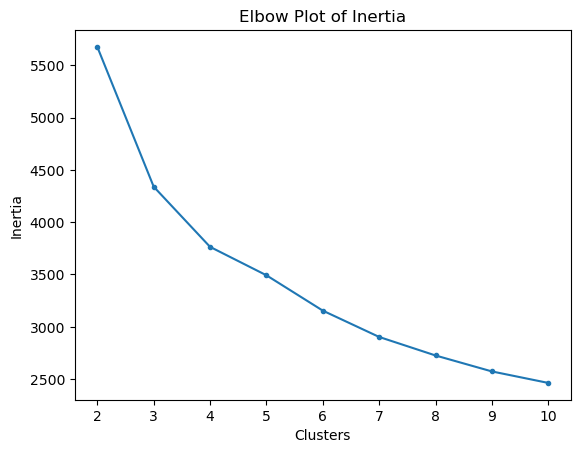

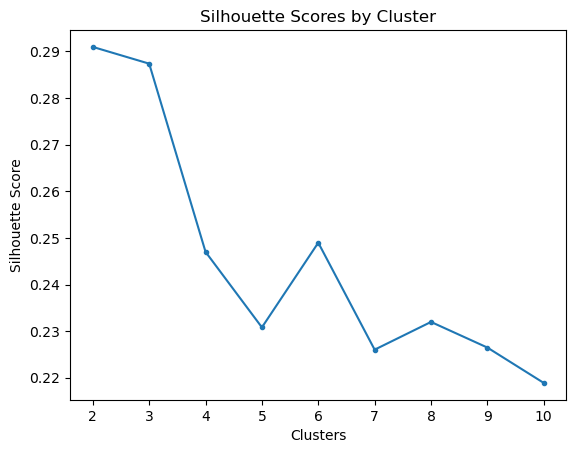

In [11]:
## Determine best K value using elbow plot/silhouette score
show_inertia_sils(scaled_df)

In [12]:
# Based on the drop off in inertia early on, and the high silhouette scores at 2 and 3 clusters,
# the choice for our model is 3
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(scaled_df)

# Add cluster labels to original dataframe for analysis
df['cluster'] = kmeans_model.labels_
df.head(3)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,2


### Analyze the customer segmentation clusters

In [13]:
# Group the dataframe by cluster and aggregate by mean values
cluster_groups = df.groupby('cluster', as_index=False).mean() # as_index=False keeps clusters as a column, not the index
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,1,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,2,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578


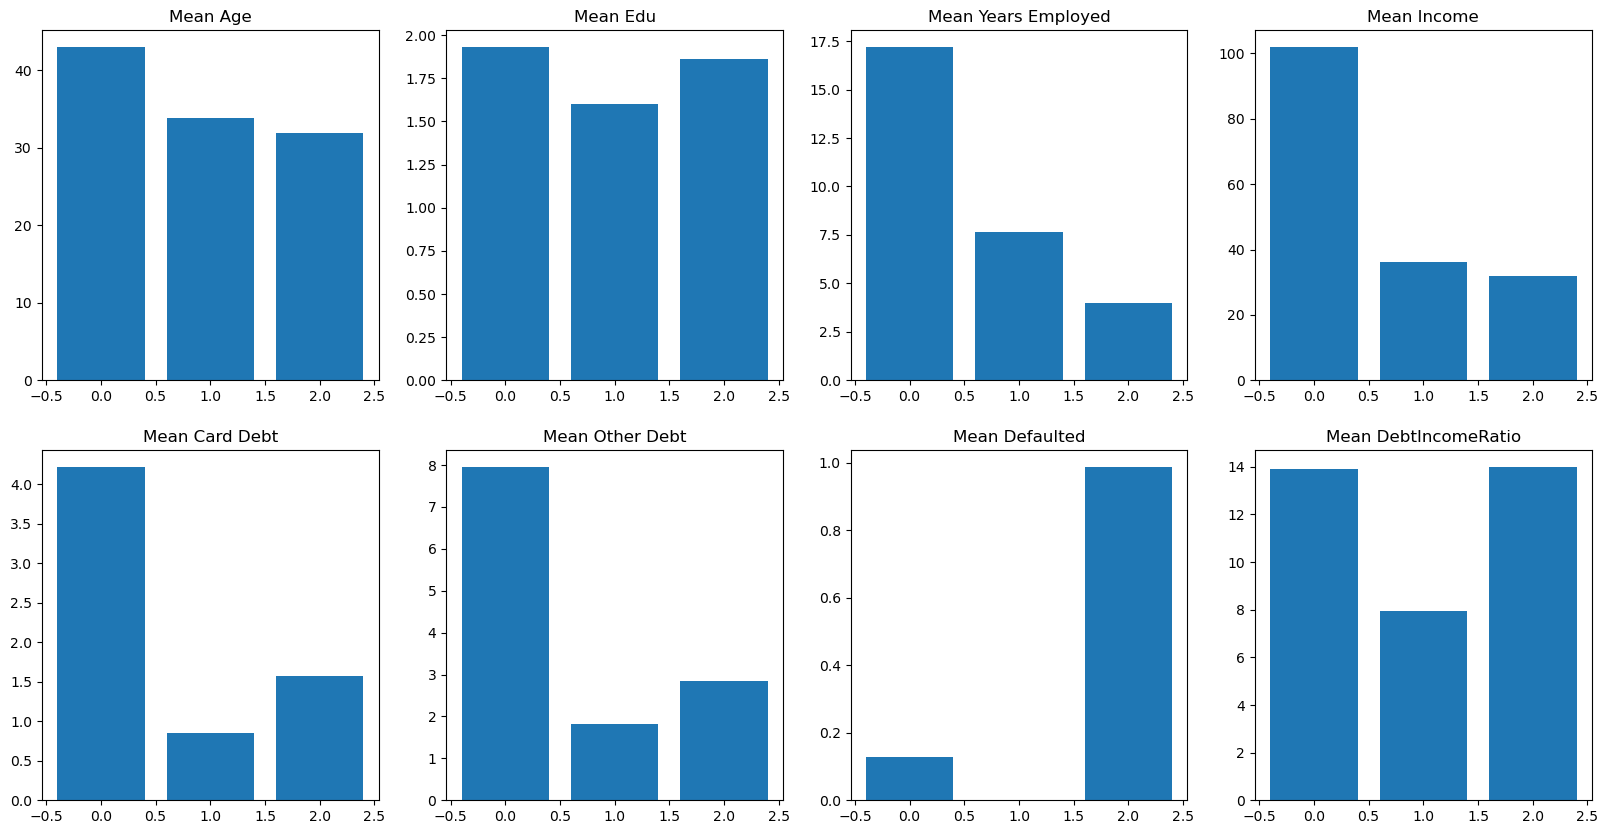

In [14]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
axes = axes.ravel()

# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Cluster zero (0) - Big Spenders**
- This group likes to make a lot of money, and spend a lot of money.
- This group has the highest average debt of the three clusters by a large margin in terms of absolute dollars, but their debt-to-income ratio is still tied for the top with Cluster 2. However to offset this high debt, we see this group also comprises the longest working and highest earning customers. In addition, they have very low incidences of default on their debt, suggesting they have expensive spending habits but keep up with their bills.
- This kind of customer might rack up large charges paying bills or for recurring luxury/lifestyle expenses, but has the income to pay off the balance regularly and is responsible with thier payments.

**Cluster one (1) - Utilitarian**
- This group tries to live modestly and within their means.
- Customers in this group have the lowest debt (card or otherwise), lowest debt-to-income ratio, and have never defaulted. Their income is more modest, but they have a steady work history, although they may tend to have just slightly less education that clusters zero or two.
- This group probably tries to save when possible, not buy things on credit they can't pay cash for, and try to make more frugal or pragmatic spending choices.

**Cluster two (2) - Struggling**
- This group *wants* to make a lot of money, and spends a lot of money.
- This group has higher average debt than cluster 1, despite earning less, and having relatively few years of work experience. While thier total debt does not rival cluster zero in absolute amount, they still have equally high debt-to-income ratio. This group contains the youngest average customers, which could be expected with the shorter work history. Most noteable though, is the fact nearly all customers in this group have defaulted on a loan.
- This group is younger working individuals not exercising restraint or a having a lacking knowledge of finances, or perhaps students or part-time workers struggling with debt and other life expenses.

### Recommendations for stakeholders

- Customers in cluster zero, the Big Spenders group, might be interested in a card that offers travel miles or rewards like  hotel stays or recreational activities on trips. This is a group that would likely have the income to spend on vaccations, would find the miles or value, and would put large purchases on the card. As they carry a high balance, this could be a benefit for the issuing institution.
- Customers in cluster one, the Utilitarian group, might be less interested in flashy vaccations or extravagant bonuses. Perhaps showcasing a cards security features, ease-of-use and protections for online shopping or bill paying, or features that simplify tasks would reach this audience more.
- Lastly for cluster two, the Struggling group, more short-term immediate rewards might be a better motivator to join, such as cash bonuses for signing up for a new account. This group has taken on high debt, in particular card debt, in a short amount of time and has a history of defaulting. This may point to a problem managing money, or unexpected expenses that set customers back. A credit/debit card designed to reduce late penalties and overdraft fees, and help people build a path out of debt may reach new customers in this group.